In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, parquet file I/O (e.g. pd.read_parquet)
import matplotlib.pyplot as plt
import seaborn as sns
import gc # garbage collector to keep RAM in check

# from sklearnex import patch_sklearn
# patch_sklearn()

IS_LOCAL = True

# Loading Dataset
Given the large dataset and kaggle kernel memory limitations, the data will be loaded into the dataframe in chunks. In addition, I will be using a memory reducing function to type cast all the float and int data types in our dataset to their space efficient data type without affecting their values. (Precision of floating point values may be affected but this downside will not affect training by much)

In [2]:
def reduce_memory_usage(df, float16_as32=True):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object and str(col_type)!='category':
            c_min, c_max = df[col].min(), df[col].max()

            # Reduces all int datatypes in dataframe to smallest datatype possible given the column's min/max values
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)

            # Reduces all float datatypes in dataframe to smallest datatype possible given the column's min/max values
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    if float16_as32:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f}MB'.format(end_mem))
    print('Decreased by {:.1f}% \n'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [3]:
# Initialize a list to hold samples from each file
samples = []

# Load a sample from each file
for i in range(10):
    if IS_LOCAL:
        file_path = f"jane-street-real-time-market-data-forecasting/train.parquet/partition_id={i}/part-0.parquet"
    else:
        file_path = f"/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id={i}/part-0.parquet"

    print('Processing file: ', file_path)
    chunk = pd.read_parquet(file_path)
    # reduce_memory_usage(chunk, False)

    # Take a sample of the data (adjust sample size as needed)
    chunk_sample = chunk.sample(n=1000000, random_state=14)
    samples.append(chunk_sample)

# Concatenate all samples into one DataFrame if needed
df = pd.concat(samples, ignore_index=True)

Processing file:  jane-street-real-time-market-data-forecasting/train.parquet/partition_id=0/part-0.parquet
Processing file:  jane-street-real-time-market-data-forecasting/train.parquet/partition_id=1/part-0.parquet
Processing file:  jane-street-real-time-market-data-forecasting/train.parquet/partition_id=2/part-0.parquet
Processing file:  jane-street-real-time-market-data-forecasting/train.parquet/partition_id=3/part-0.parquet
Processing file:  jane-street-real-time-market-data-forecasting/train.parquet/partition_id=4/part-0.parquet
Processing file:  jane-street-real-time-market-data-forecasting/train.parquet/partition_id=5/part-0.parquet
Processing file:  jane-street-real-time-market-data-forecasting/train.parquet/partition_id=6/part-0.parquet
Processing file:  jane-street-real-time-market-data-forecasting/train.parquet/partition_id=7/part-0.parquet
Processing file:  jane-street-real-time-market-data-forecasting/train.parquet/partition_id=8/part-0.parquet
Processing file:  jane-stree

# Analyzing Dataset

In [4]:
pd.set_option('display.max_columns', None) # Sets an option to let pandas show all columns. Without this, the columns will be truncated.

In [5]:
# df = df[df.columns.drop(list(df.filter(regex='responder_[^6]')))]
df.head()

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,120,287,12,1.676607,NaN,NaN,NaN,NaN,NaN,-0.297848,-0.130219,-0.670482,-0.118086,70,7,410,-0.158920,-0.332174,-0.683595,4.150124,2.482680,3.507880,-1.422583,0.153096,-1.300076,NaN,0.919727,1.358546,-1.163901,-1.316866,NaN,NaN,0.042984,0.896122,2.670339,NaN,-1.105757,1.163593,-1.460177,-1.493631,0.804064,-1.678901,-1.190718,1.883993,2.552055,2.742895,2.565375,3.084089,2.048523,0.091931,3.469430,0.535307,-0.004972,-0.009337,0.027095,1.720541,1.406440,0.289532,2.573249,-1.410197,0.946749,0.797906,0.695601,-0.016263,-0.195395,1.264350,-0.540927,-0.374896,-0.542173,0.493787,0.535644,-0.570841,-0.375021,-0.481233,0.318065,-0.361956,-0.622751,-0.256269,-0.236350,-0.177285,-0.243313,-0.227955,-0.327846,-0.001069,-1.434054,0.002541,-0.056951,-2.801984,-0.061711,-0.082736,-0.102154,-0.082833
1,80,194,9,2.820767,NaN,NaN,NaN,NaN,NaN,-0.153556,0.046261,0.014787,0.125892,11,7,76,-0.520428,-0.373733,-0.609213,-0.707432,-0.401775,-0.489695,0.179123,-1.187338,2.188596,NaN,1.601844,0.465692,2.810217,2.384957,NaN,NaN,-0.432737,-0.285547,-0.709489,NaN,-1.455024,-2.356350,-1.859588,-1.267175,-1.488458,0.034288,-0.050981,-0.152622,0.973276,0.606652,1.380562,0.889716,1.526782,-0.510984,1.385191,-0.552800,-0.776175,-0.351085,-0.666552,-0.722994,-1.009231,2.281727,0.107930,1.283773,-1.510330,1.368846,0.137837,0.115631,0.196490,-2.189381,-0.221851,-0.123484,-0.205143,0.637830,-0.462699,-0.316379,-0.276190,-0.443808,-0.628578,-0.196799,-0.547541,-0.218256,-0.170701,-0.194217,-0.187137,-0.280385,-0.336267,-1.132406,0.250679,0.072878,-0.167068,0.491496,-0.049105,0.231842,0.678853,-0.084436
2,48,779,17,1.100885,NaN,NaN,NaN,NaN,NaN,0.469673,-0.280801,0.320413,-0.329571,64,6,376,-0.359095,-0.187994,-0.257518,-0.281922,-0.629699,-0.515686,0.251096,2.522996,-0.597790,NaN,-0.398583,-0.546230,-1.261520,-0.648316,NaN,NaN,0.308839,-0.613855,-0.251308,NaN,0.065343,1.017886,-0.116498,-0.470975,0.612401,-0.054751,-0.153650,1.692071,2.323479,1.893632,2.409080,2.388014,2.595232,0.336645,2.328133,0.658248,0.056078,0.015320,-0.357970,-0.375142,-0.191832,0.139176,0.830118,0.033043,0.947477,1.073950,0.396060,0.168074,-0.068231,0.302530,-0.120388,-0.117235,-0.194552,0.259838,1.728493,-0.689257,-0.344735,-0.216223,-0.236509,-0.215728,-0.188142,-0.807630,-0.730699,-0.725818,-1.072702,-0.886442,-0.613987,0.029632,5.000000,-0.110397,1.441502,3.986102,-0.022835,1.258822,0.380239,0.067097
3,157,662,33,1.783180,NaN,NaN,NaN,NaN,NaN,-1.079207,-0.346103,0.521204,2.360860,11,7,76,-0.344727,-0.493228,-0.782537,0.051463,-0.462463,-0.028515,1.782498,0.558842,1.160105,NaN,-0.122004,0.258302,-1.724457,-0.784964,NaN,NaN,0.376989,-0.201710,0.463056,NaN,-0.780720,-0.621850,-1.212463,-0.105671,0.021743,2.186448,1.841520,-2.107773,-1.555648,-2.057786,-0.940546,-1.968590,-1.495262,-1.664662,-1.570500,-0.163262,0.186195,0.174731,0.519673,-1.742033,0.030310,0.417461,-1.265812,-0.026311,-1.081065,-2.251131,-0.208521,-0.041197,0.008620,0.563549,0.060183,0.356454,0.167951,0.857754,1.075345,-0.472629,-0.32802

In [10]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
count,1e+07,1e+07,1e+07,1e+07,8.55836e+06,8.55836e+06,8.55836e+06,8.55836e+06,8.55836e+06,1e+07,1e+07,1e+07,9.94537e+06,1e+07,1e+07,1e+07,1e+07,1e+07,1e+07,9.738e+06,9.99991e+06,9.95617e+06,9.99992e+06,9.99992e+06,1e+07,6.85486e+06,1e+07,1e+07,1e+07,1e+07,6.85486e+06,6.85486e+06,1e+07,1e+07,1e+07,6.85486e+06,9.89618e+06,9.89618e+06,1e+07,1e+07,1e+07,9.9998e+06,1e+07,8.95415e+06,9.97069e+06,9.73424e+06,8.95415e+06,9.97069e+06,9.73424e+06,9.86555e+06,9.86555e+06,9.99995e+06,1e+07,1e+07,8.9754e+06,9.99533e+06,9.75636e+06,8.9754e+06,9.99533e+06,9.75636e+06,9.99992e+06,9.99992e+06,9.89618e+06,1e+07,1e+07,1e+07,9.87528e+06,9.89987e+06,9.89612e+06,9.86555e+06,9.86555e+06,1e+07,1e+07,1e+07,1e+07,1e+07,1e+07,9.89519e+06,9.89519e+06,9.98982e+06,9.98982e+06,9.99634e+06,9.99634e+06,1e+07,1e+07,1e+07,1e+07,1e+07,1e+07,1e+07,1e+07,1e+07
mean,851.595,459.775,17.4505,1.96243,0.514273,0.0102765,0.513896,0.513599,-0.00177111,-0.0280872,-0.00402015,-0.0103827,0.0591446,32.6515,4.82822,171.906,-0.0287716,-0.0173662,-0.0269771,-0.171835,-0.142665,-0.16623,0.00273348,-0.0178074,-0.119625,0.0305764,0.0589798,0.0724056,0.372582,0.092927,-0.0426615,-0.228623,-0.128317,-0.167487,-0.175197,0.0288902,0.33458,-0.00969264,0.355149,0.353957,0.00163406,0.0252445,0.032397,0.00411389,0.00933006,0.0166634,-0.0217332,-0.0310178,-0.0375637,-0.000629648,-0.00992227,-0.00913843,-0.00132535,-0.00330231,-0.0499625,-0.0758319,-0.0704169,0.0466639,0.0437552,0.0597911,-0.0252392,0.0171862,-0.0111566,-0.00208272,-0.0050482,0.00786977,-0.0842285,-0.0671526,-0.0802861,-0.0090232,-0.0183163,-0.0311188,-0.0157294,-0.0266304,-0.0248553,-0.0138851,-0.0240987,-0.0188425,-0.0232347,-0.00714531,-0.0112436,-0.0106175,-0.0147256,-0.000499111,0.00102745,0.000323905,-0.0125008,-0.00904506,-0.0128712,-0.00263923,-0.000193557,-0.00137259
std,488.902,267.941,11.3256,1.10943,1.29277,1.06856,1.28909,1.28892,1.02797,1.01888,1.05444,1.0514,0.96943,24.1315,2.94375,166.696,0.948386,0.940872,0.94744,0.951415,0.937706,0.950443,1.0371,1.05711,0.945869,0.916091,0.990043,0.957702,1.40031,1.02528,1.05485,1.06035,1.03963,0.89044,0.958037,0.758772,1.22268,1.02351,1.24828,1.24517,0.976589,0.95612,0.953326,0.998689,0.957477,0.974658,1.00261,0.959646,0.978496,1.00578,1.02081,1.19658,0.981145,0.990576,1.03112,0.967116,1.01651,1.03684,0.95936,1.0125,1.01229,1.03497,0.969194,0.962086,0.968862,1.10059,1.04715,0.996475,1.01301,1.0406,1.05608,0.936539,0.930098,0.935863,0.958665,0.926055,0.959402,0.954162,0.947884,0.955422,0.946569,0.944988,0.942581,0.651003,0.670645,0.649776,0.860381,0.918041,0.776537,0.897471,0.925094,0.875477
min,0,0,0,0.149967,-5.79413,-5.4705,-5.72601,-5.60189,-5.79988,-23.8333,-42.277,-36.8923,-14.4016,2,1,9,-1.91308,-0.894915,-1.39913,-1.67105,-1.63639,-1.69628,-6.00073,-5.63648,-4.62003,-0.558637,-2.6029,-2.58501,-3.23494,-2.17843,-3.45106,-3.47554,-4.0639,-1.59573,-1.67069,-0.503498,-5.26924,-4.56532,-5.23816,-4.73371,-5.16108,-14.9278,-27.9458,-5.60537,-4.32048,-5.0186,-5.35838,-5.15849,-5.85

Based on the training dataset, some of the notable traits I found are:
- There are 79 total features named feature_xx where xx is 0 to 78
- There are 9 total responders named responder_x where x is 0 to 8 (The responder of value to us for this competition is responder 6)
- There are 47,127,338 rows
- There are 1,699 unique days

In [7]:
# Print the number of rows
print(f"Total number of rows: {len(df)}")

Total number of rows: 10000000


In [8]:
# Count the unique 'date_id' values and the number of years these dates add up to
unique_dates = df['date_id'].nunique()

print(f"Number of unique days (date_id): {unique_dates}")
print(f"Number of years: {unique_dates/365.25:.2f}")

Number of unique days (date_id): 1699
Number of years: 4.65


/var/folders/_7/jrw1_3750s7gxyngkd3mvfpr0000gn/T/ipykernel_2061/2392493149.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['responder_6'],


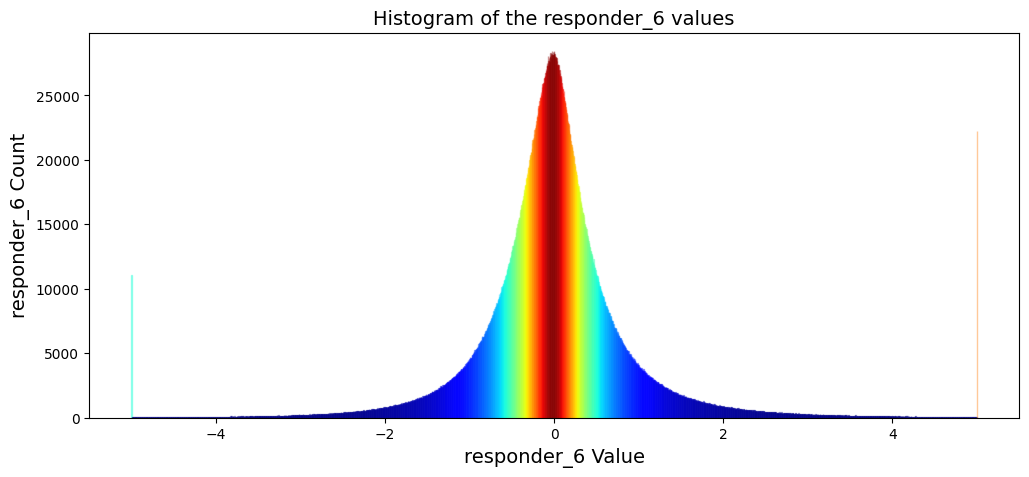

[{'collections': 2595, 'collected': 4034, 'uncollectable': 0},
 {'collections': 235, 'collected': 4062, 'uncollectable': 0},
 {'collections': 19, 'collected': 1097029, 'uncollectable': 0}]

In [21]:
plt.figure(figsize = (12,5))
ax = sns.distplot(df['responder_6'],
             bins=3000,
             kde_kws={"clip":(-5,5)},
             hist_kws={"range":(-5,5)},
             color='darkcyan',
             kde=False);
values = np.array([rec.get_height() for rec in ax.patches])
norm = plt.Normalize(values.min(), values.max())
colors = plt.cm.jet(norm(values))
for rec, col in zip(ax.patches, colors):
    rec.set_color(col)
plt.title("Histogram of the responder_6 values", size=14)
plt.xlabel("responder_6 Value", size=14)
plt.ylabel("responder_6 Count", size=14)
plt.show()
gc.collect()
gc.get_stats()

In [26]:
# Assuming day_100 and day_200 are already defined
day_100 = df.loc[df['date_id'] == 100]
day_200 = df.loc[df['date_id'] == 200]

# Concatenate the two DataFrames
day_100_and_200 = pd.concat([day_100, day_200])

# Calculate the correlation matrix
correlation_matrix = day_100_and_200.corr(method='pearson')

# Use the Styler to apply formatting and background gradient
styled_corr = correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None).format("{:.2f}")

# Display the styled correlation matrix
styled_corr

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67
